In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Import data
df = pd.read_csv('/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab5/california_house_prices.csv')

# Read dataset
coast = gpd.read_file('/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab5/california_coastline.shp')

In [20]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319
1,180000,2,1.00,770,10000,1933,47.7379,-122.233
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005
...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069


In [21]:
coast

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COUNTY_,COUNTY_ID,LUCODE,STATE,geometry
0,297,291,1,24,15270.99572,113,12,2,CA,"MULTILINESTRING ((-124.22911 40.74913, -124.22..."


In [40]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'geometry'],
      dtype='object')

In [3]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

In [4]:
# Compute distance to Space Needle 
distance_to_coast = []
for i in range(gdf_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
gdf_utm['distance_to_coast'] = distance_to_coast

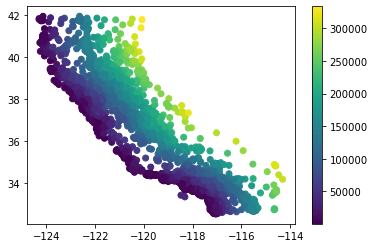

In [5]:
# Quickly check that it worked!
plt.scatter(gdf_utm['longitude'], gdf_utm['latitude'], c=gdf_utm['distance_to_coast'])
plt.colorbar()

In [6]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.668566
total_rooms           0.152923
households            0.098525
total_bedrooms        0.079023
population            0.020930
housing_median_age    0.014355
longitude            -0.020092
latitude             -0.173908
distance_to_coast    -0.505078
Name: median_house_value, dtype: float64

In [7]:
# Rooms per house
gdf_utm['rooms_per_house'] = gdf_utm['total_rooms'] / gdf_utm['households']

# Bedrooms per house
gdf_utm['bedrooms_per_room'] = gdf_utm['total_bedrooms'] / gdf_utm['total_rooms']

In [8]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.668566
total_rooms           0.152923
rooms_per_house       0.113277
households            0.098525
total_bedrooms        0.079023
population            0.020930
housing_median_age    0.014355
longitude            -0.020092
latitude             -0.173908
bedrooms_per_room    -0.233964
distance_to_coast    -0.505078
Name: median_house_value, dtype: float64

In [9]:
# Define feature list
feature_list =  ['median_income', 'distance_to_coast', 'bedrooms_per_room', 
                 'total_rooms', 'rooms_per_house', 'total_bedrooms', 'households']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['median_house_value']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [10]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [12]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

55739.784271081

# Question 1 

In [13]:
#from sklearn.ensemble import RandomForestRegressor

#forest_reg = RandomForestRegressor(n_estimators = 30)

#forest_reg.fit 

In [17]:
# Import data for Seattle 
seattle_data = pd.read_csv('/Users/jack/Documents/GitHub/geospatial-data-science/labs/lab5/seattle_house_prices.csv')

In [18]:
seattle_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long'],
      dtype='object')

In [46]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19451 non-null  int64  
 1   bedrooms     19451 non-null  int64  
 2   bathrooms    19451 non-null  float64
 3   sqft_living  19451 non-null  int64  
 4   sqft_lot     19451 non-null  int64  
 5   yr_built     19451 non-null  int64  
 6   lat          19451 non-null  float64
 7   long         19451 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.2 MB


In [34]:
# Check the number of houses 
seattle_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319
1,180000,2,1.00,770,10000,1933,47.7379,-122.233
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005
...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069


In [35]:
seattle_data.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
19446,False,False,False,False,False,False,False,False
19447,False,False,False,False,False,False,False,False
19448,False,False,False,False,False,False,False,False
19449,False,False,False,False,False,False,False,False


In [37]:
# Check the null value in dataset 
print(seattle_data.isnull().sum())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
yr_built       0
lat            0
long           0
dtype: int64


In [53]:
# Convert DataFrame to GeoDataFrame
seattle_gdf = gpd.GeoDataFrame(seattle_data, geometry=gpd.points_from_xy(seattle_data['long'], seattle_data['lat']))
seattle_gdf = seattle_gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
seattle_gdf_utm = seattle_gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

In [54]:
# Compute distance to coast
distance_to_coast = []
for i in range(gdf_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
gdf_utm['distance_to_coast'] = distance_to_coast

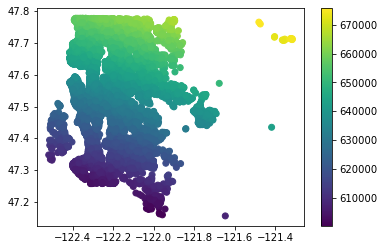

In [55]:
# Quickly check that it worked!
plt.scatter(gdf_utm['long'], gdf_utm['lat'], c=gdf_utm['distance_to_coast'])
plt.colorbar()

In [56]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                1.000000
sqft_living          0.702296
bathrooms            0.524395
bedrooms             0.315804
distance_to_coast    0.313581
lat                  0.308082
sqft_lot             0.090125
yr_built             0.052453
long                 0.020092
Name: price, dtype: float64

In [57]:
seattle_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'geometry'],
      dtype='object')

In [58]:
seattle_data.info

<bound method DataFrame.info of          price  bedrooms  bathrooms  sqft_living  sqft_lot  yr_built      lat  \
0       538000         3       2.25         2570      7242      1951  47.7210   
1       180000         2       1.00          770     10000      1933  47.7379   
2       604000         4       3.00         1960      5000      1965  47.5208   
3       510000         3       2.00         1680      8080      1987  47.6168   
4      1230000         4       4.50         5420    101930      2001  47.6561   
...        ...       ...        ...          ...       ...       ...      ...   
19446   475000         3       2.50         1310      1294      2008  47.5773   
19447   360000         3       2.50         1530      1131      2009  47.6993   
19448   400000         4       2.50         2310      5813      2014  47.5107   
19449   400000         3       2.50         1600      2388      2004  47.5345   
19450   325000         2       0.75         1020      1076      2008  47.5941

In [61]:
# Define feature list
seattle_feature_list =  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'lat', 'long']

# Define features and labels 
X = gdf_utm[seattle_feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [62]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [64]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [67]:
# Predict test labels predictions
seattle_predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

26690.897649870793

# Questions/Answers

# Insang Demo

In [73]:
from shapely.geometry import Point
rand_point = Point(5.6e5, 5.27e6)
rand_gdf = gpd.GeoDataFrame(geometry = [rand_point])


<AxesSubplot:>

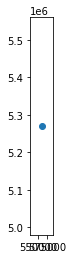

In [74]:
rand_gdf.plot()